In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder


In [2]:
df= pd.read_excel('F:\\New folder\\Food_Ingredients.xlsx')
df

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Seasoning2,Allergens,Allergens2,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,NaN,Almonds,Wheat,Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,NaN,Almonds,Wheat,Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,NaN,Chicken,Wheat,Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,NaN,Chicken,Wheat,Contains
4,Cheddar Cheese,Cheese,None,None,Salt,NaN,Dairy,NaN,Contains
...,...,...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,Flour,eggs,Wheat,Dairy,Contains
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,NaN,Wheat,Dairy,Contains
396,Zucchini Bread,Zucchini,Sugar,Butter,Cinnamon,nuts,Wheat,Dairy,Contains
397,Banana Bread,Bananas,Sugar,Butter,Cinnamon,nuts,Wheat,Dairy,Contains


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Food Product     399 non-null    object
 1   Main Ingredient  399 non-null    object
 2   Sweetener        399 non-null    object
 3   Fat/Oil          399 non-null    object
 4   Seasoning        399 non-null    object
 5   Seasoning2       216 non-null    object
 6   Allergens        399 non-null    object
 7   Allergens2       127 non-null    object
 8   Prediction       399 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


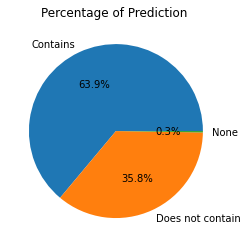

In [6]:
data = df.groupby(['Prediction'])['Food Product'].count().reset_index(name='Total_numbers')
Prediction= data.set_index('Prediction')

names =data['Prediction']
numbers= data['Total_numbers']
plt.pie(numbers, labels = names, autopct='%1.1f%%')
plt.title('Percentage of Prediction ')
plt.show()

In [16]:
import plotly.express as px

data = df.groupby(['Main Ingredient'])['Food Product'].count().reset_index(name='Total_numbers')
#data= data[data.Total_numbers > 2] 
Data= data.sort_values('Total_numbers',ascending = True)

fig = px.bar(Data, x="Main Ingredient", y="Total_numbers", color="Total_numbers", 
             title="How many products use each ingredient as the primary ingredient",text_auto=True)
fig.show()

In [15]:
data = df.groupby(['Sweetener'])['Food Product'].count().reset_index(name='Total_numbers')
#data= data[data.Total_numbers > 2] 
Data= data.sort_values('Total_numbers',ascending = True)

fig = px.bar(Data, x="Sweetener", y="Total_numbers", color="Total_numbers", 
             title="How many products use each Sweetener",text_auto=True)
fig.show()

In [14]:
data = df.groupby(['Fat/Oil'])['Food Product'].count().reset_index(name='Total_numbers')
#data= data[data.Total_numbers > 2] 
Data= data.sort_values('Total_numbers',ascending = True)

fig = px.bar(Data, x="Fat/Oil", y="Total_numbers", color="Total_numbers", 
             title="How many products use each Fat/Oil",text_auto=True)
fig.show()

In [20]:
data = df.groupby(['Seasoning'])['Food Product'].count().reset_index(name='Total_numbers')
data= data[data.Total_numbers > 2] 
Data= data.sort_values('Total_numbers',ascending = True)

fig = px.bar(Data, x="Seasoning", y="Total_numbers", color="Total_numbers", 
             title="How many products use each Seasoning",text_auto=True)
fig.show()

In [21]:
data = df.groupby(['Allergens'])['Food Product'].count().reset_index(name='Total_numbers')
#data= data[data.Total_numbers > 2] 
Data= data.sort_values('Total_numbers',ascending = True)

fig = px.bar(Data, x="Allergens", y="Total_numbers", color="Total_numbers", 
             title="How many products contain the allergen?",text_auto=True)
fig.show()

In [23]:
data = df.groupby(['Food Product'])['Allergens'].count().reset_index(name='Total_numbers')
data= data[data.Total_numbers > 1] 
Data= data.sort_values('Total_numbers',ascending = True)

fig = px.bar(Data, x="Food Product", y="Total_numbers", color="Total_numbers", 
             title="How many products contain the allergen?",text_auto=True)
fig.show()

In [37]:
le = LabelEncoder()

s = df['Food Product']
S = le.fit_transform(s)
df['Food Product'] = S
df['Food Product']

0        0
1        0
2       71
3       71
4       57
      ... 
394    127
395    175
396    256
397     17
398    119
Name: Food Product, Length: 399, dtype: int32

In [38]:
s = df['Main Ingredient']
S = le.fit_transform(s)
df['Main Ingredient'] = S
df['Main Ingredient']

0        0
1        0
2       23
3       23
4       20
      ... 
394     48
395     68
396    100
397      5
398     71
Name: Main Ingredient, Length: 399, dtype: int32

In [39]:
s = df['Sweetener']
S = le.fit_transform(s)
df['Sweetener'] = S
df['Sweetener']

0      8
1      8
2      6
3      6
4      6
      ..
394    8
395    8
396    8
397    8
398    6
Name: Sweetener, Length: 399, dtype: int32

In [40]:
s = df['Fat/Oil']
S = le.fit_transform(s)
df['Fat/Oil'] = S
df['Fat/Oil']

0       3
1       3
2      21
3      21
4      21
       ..
394     3
395     3
396     3
397     3
398    21
Name: Fat/Oil, Length: 399, dtype: int32

In [41]:
s = df['Seasoning']
S = le.fit_transform(s)
df['Seasoning'] = S
df['Seasoning']

0      41
1      41
2      96
3      96
4      96
       ..
394    41
395    29
396    26
397    26
398    83
Name: Seasoning, Length: 399, dtype: int32

In [42]:
s = df['Allergens']
S = le.fit_transform(s)
df['Allergens'] = S
df['Allergens']

0       0
1       0
2       1
3       1
4       2
       ..
394    13
395    13
396    13
397    13
398    13
Name: Allergens, Length: 399, dtype: int32

In [43]:
s = df['Seasoning2']
S = le.fit_transform(s)
df['Seasoning2'] = S
df['Seasoning2']

0      59
1      59
2      59
3      59
4      59
       ..
394    20
395    59
396    36
397    36
398    25
Name: Seasoning2, Length: 399, dtype: int32

In [44]:
s = df['Allergens2']
S = le.fit_transform(s)
df['Allergens2'] = S
df['Allergens2']

0      12
1      12
2      12
3      12
4      13
       ..
394     3
395     3
396     3
397     3
398     9
Name: Allergens2, Length: 399, dtype: int32

In [45]:
df

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Seasoning2,Allergens,Allergens2,Prediction
0,0,0,8,3,41,59,0,12,Contains
1,0,0,8,3,41,59,0,12,Contains
2,71,23,6,21,96,59,1,12,Contains
3,71,23,6,21,96,59,1,12,Contains
4,57,20,6,21,96,59,2,13,Contains
...,...,...,...,...,...,...,...,...,...
394,127,48,8,3,41,20,13,3,Contains
395,175,68,8,3,29,59,13,3,Contains
396,256,100,8,3,26,36,13,3,Contains
397,17,5,8,3,26,36,13,3,Contains


In [46]:
df.corr()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Seasoning2,Allergens,Allergens2
Food Product,1.000000,0.523192,-0.004210,0.167671,0.103020,-0.047989,0.003382,0.093943
Main Ingredient,0.523192,1.000000,-0.059914,0.106601,0.003362,-0.189238,0.023813,0.072753
Sweetener,-0.004210,-0.059914,1.000000,-0.210390,-0.109902,0.080749,0.240965,-0.257427
Fat/Oil,0.167671,0.106601,-0.210390,1.000000,0.251215,0.134960,-0.330573,0.511679
Seasoning,0.103020,0.003362,-0.109902,0.251215,1.000000,0.057668,-0.141323,0.189771
Seasoning2,-0.047989,-0.189238,0.080749,0.134960,0.057668,1.000000,0.056359,0.080231
Allergens,0.003382,0.023813,0.240965,-0.330573,-0.141323,0.056359,1.000000,-0.687990
Allergens2,0.093943,0.072753,-0.257427,0.511679,0.189771,0.080231,-0.687990,1.000000


In [47]:
df.fillna(0, inplace=True)

In [48]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.20,random_state=42)
train_set

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Seasoning2,Allergens,Allergens2,Prediction
3,71,23,6,21,96,59,1,12,Contains
18,32,57,8,35,47,59,2,13,Contains
377,249,96,6,23,117,10,13,3,Contains
248,219,88,6,21,107,57,6,13,Does not contain
177,22,43,6,21,22,59,6,13,Does not contain
...,...,...,...,...,...,...,...,...,...
71,93,50,6,12,30,52,2,13,Contains
106,234,82,6,31,112,59,4,13,Contains
270,64,21,6,22,35,59,6,13,Does not contain
348,160,62,0,3,87,13,13,3,Contains


In [49]:
train_lable = train_set["Prediction"].copy()
Train_set =train_set.drop('Prediction', axis=1)
Train_set

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Seasoning2,Allergens,Allergens2
3,71,23,6,21,96,59,1,12
18,32,57,8,35,47,59,2,13
377,249,96,6,23,117,10,13,3
248,219,88,6,21,107,57,6,13
177,22,43,6,21,22,59,6,13
...,...,...,...,...,...,...,...,...
71,93,50,6,12,30,52,2,13
106,234,82,6,31,112,59,4,13
270,64,21,6,22,35,59,6,13
348,160,62,0,3,87,13,13,3


In [50]:
test_lable = test_set["Prediction"].copy()
Test_set =test_set.drop('Prediction', axis=1)
Test_set

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Seasoning2,Allergens,Allergens2
198,88,21,6,23,25,30,6,13
349,5,1,8,3,26,37,13,3
33,155,60,6,3,1,2,2,13
208,12,24,6,23,99,59,6,13
93,11,13,6,21,49,36,2,8
...,...,...,...,...,...,...,...,...
249,199,96,6,23,85,26,6,13
225,131,21,6,23,52,26,6,13
368,16,66,6,21,117,10,13,3
175,52,1,1,21,69,59,6,13


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(Train_set, train_lable)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression())])

pipe.score(Test_set,test_lable) 

0.75

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
  
# create logistic regression object
reg = LogisticRegression()
  
# train the model using the training sets
reg.fit(Train_set, train_lable)
 
# making predictions on the testing set
y_pred = reg.predict(Test_set)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):",
metrics.accuracy_score(test_lable, y_pred)*100)


Logistic Regression model accuracy(in %): 73.75


C:\Users\yasse\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Train_set, train_lable)
 
# making predictions on the testing set
y_pred = dtc.predict(Test_set)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Decision Tree model accuracy(in %):",
metrics.accuracy_score(test_lable, y_pred)*100)


Decision Tree model accuracy(in %): 97.5
